### 5.3 Gradient Descent

#### 실제값을 Y = 4X + 6 시뮬레이션하는 데이터 값 생성

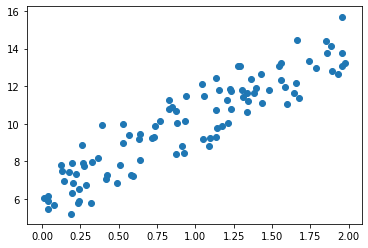

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X = 2 * np.random.rand(100,1)  # x는 100개의 랜덤값을 만듬
y = 6 +4 * X+np.random.randn(100,1)  # y = 4X + 6 식을 근사하기 위해 Noise값으로 random.randn(100,1)만듬 -> 퍼져보이기 위해 

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape
# 2차원으로 된 100개의 데이터를 가지고 있고, 이에 매핑되는 y값 100개

((100, 1), (100, 1))


#### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.

- 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
- 새로운 w1과 w0를 update함

In [3]:
# w0과 w1을 업데이트 할 w0 update와 w1 update를 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):  # get_weight_updates에서 업데이트를 그래디언트 방식으로 할 것임
                    # 업데이트 할 w1과 w0, 속성, 학습률 
    N = len(y)
    
    # zeros_like하여 인자로 들어온 w1만큼의 shape에 해당되는 것을 0으로 만들어 0으로 된 초기화 값 w1_update, w0_update 만듬
    w1_update = np.zeros_like(w1) 
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0   # 예측값이 하나씩 매핑됨
    diff = y-y_pred                 # 실제값과 예측값의 차이 계산
                                    # 이 결과 diff는 100개를 가지게 됨 
                                    # 100개의 데이터에 대해서 100개의 예측값이 만들어지므로 100개의 예측 차이값이 생김
         
    # w0_update를 dot 행렬 연산으로 구하기 위한 수정 사안
    # diff는 하나의 값으로 출력되야 하는데 100개의 열을 가지고 있으므로 1값으로 되어있는 행렬을 만들어 줌
    w0_factors = np.ones((N,1))  

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))       # np.dot(X.T, diff): x*(실제값-예측값)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))   
    
    return w1_update, w0_update

#### 반복적으로 경사 하강법을 이용하여 get_weigh_updates를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):    
    
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # iters=10000이므로 10000번 get_weight_updates() 호출하여 w1, w0 업데이트 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

#### 예측 오차 비용을 계산하는 함수 생성 및 경사 하강법 수행

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N  # 평균 예측 오류 값 구함
    return cost

# w0과 w1구하면 최종 회귀계수와 예측 오류를 구할 수 있음
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# w1은 4였는데 4.022가 나오고, w0은 6이었는데 6.162가 나옴

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


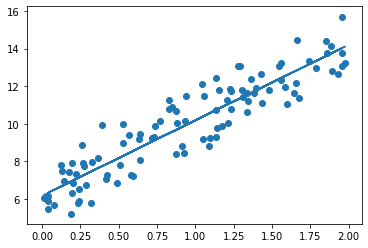

In [6]:
plt.scatter(X, y)
plt.plot(X,y_pred)

# 상당히 정확도가 높은 선형 회귀 선이 그려짐

# 하지만 위 방법은 반복적으로 계속 수행하므로 시간이 오래 거림
# 일반적으로 미니 배치 확률적 경사 하강법을 이용해 최적 비용 함수를 호출함

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
- 함수 호출하는 방법은 같지만 샘플링하는 방법이 다름
- 위에서는 전체 데이터를 사용했지만, 이번에는 임의로 몇 개의 샘플링한 데이터만을 사용하여 시간이 단축됨

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])  #  np.random.permutation(X.shape[0]): 임의로 몇 개만 샘플링 값 추출
        sample_X = X[stochastic_random_index[0:batch_size]]  # [0:batch_size]: 랜덤하게 샘플링 한 것 중 batch 사이즈가 10이므로 10개 추출
        sample_y = y[stochastic_random_index[0:batch_size]]
       
        # 랜덤하게 10개 추출된 데이터로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# cost가 위에서와 비슷하게 나옴

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


### 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이터 셋을 알아보기 쉽게 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# price가 우리가 예측해야 할 값

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

#### 각 피처들이 주택 가격에 미치는 영향을 알아보기 위해 regplot 그림

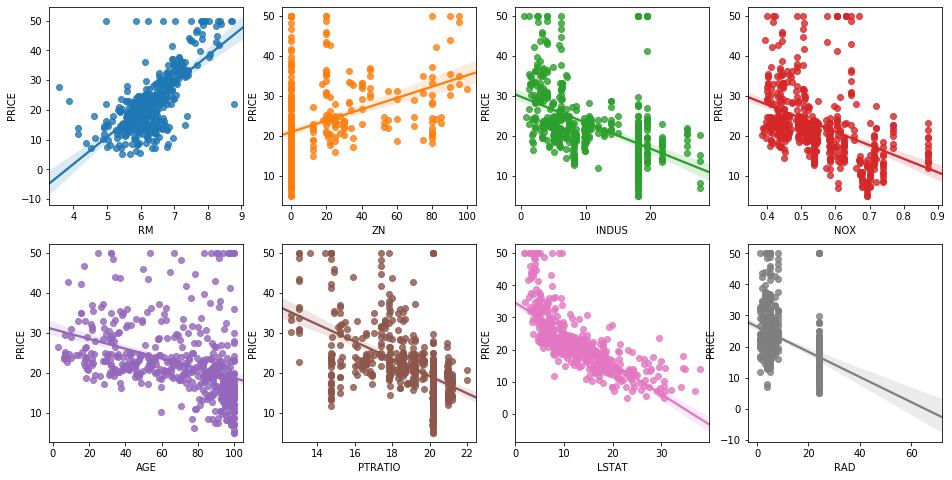

In [10]:
# regplot을 이용하기 위해 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # 2차원 평면에서 x축 피처, y축 타겟 값으로 설정하면 이에 맞는 회귀 곡선을 그려줌
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])
    
# rm 방 개수가 클수록 집값이 상향되고 있음
# zn 은 크게 영향은 안받지만 곡선도 어느정도 상향
# indus는 곡선이 하향 중
# nox 일산화질 농도도 하향 
# age도 하향
# ptratio도 하향
# lstat 하위계층 비율은 가장 큰 하향 직선으로 나타냄
# rad 고속도로 접근 용이도도 하향

#### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']  # 타겟값은 price
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)  # price를 드롭한 나머지 데이터들이 피처 데이터가 됨

# 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  # 예측 오류 값
rmse = np.sqrt(mse)  # 사이킷런이 지원하지 않으므로 numpy에서 호출해 옴

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))  # r^2는 r2_score로 호출

# 결과가 좋은 수치는 아님

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [12]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

# lr.coef_: 학습이 된 선형 회귀 객체의 coef_ 속성을 확인

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [13]:
# 위의 회귀 계수값을 보기 편하게 칼럼별로 매칭
# 값이 큰 수로 정렬하되 칼럼명도 함께 나오도록
# Series로 생성
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )  # 시리즈를 만드는데 데이터는 coef로 하고, 인덱스는 칼럼명으로 함  
coeff.sort_values(ascending=False)  # 가장 큰 값을 가진 칼럼별로 정렬

# rm이 가장 큼
# nox가 가장 큰 마이너스 값인데, 전체 값에 비해 너무 큼 -> 이 값에 따라서 예측 오류값이 오르락 내리락 할 듯

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [14]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

# Negative MSE scores는 모두 - 이므로 rmse를 구하기 위해 코드에서 -1을 곱해줬음

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 5-5. Polynomial Regression과 오버피팅/언더피팅 이해
### Polynomial Regression 이해
- PolynomialFeatures 클래스로 다항식 변환 


In [15]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

# x1,x2 = 0,1인 데이터는 [1. 0. 1. 0. 0. 1.]
# x1,x2 = 2,3인 데이터는 [1. 2. 3. 4. 6. 9.]으로 변환됨

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


#### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3 

In [16]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3  # 3차 다항식
    return y

# 단항식
X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

# 3차 다항식으로 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# 3차 다항식을 학습데이터로 선형회귀에 넣어 fit해 회귀계수 확인
model = LinearRegression()
model.fit(poly_ftr,y) 
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

# 0,1을 넣으면 5가 나오고, 2,3을 넣으면 125가 나옴
# 0,1을 3차 다항식 계수로 보면 [ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
# 2,3을 3차 다항식 계수로 보면 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]
3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 사이킷런 파이프라인을 이용하여 3차 다항회귀 학습
- 사이킷런의 파이프라인 객체: Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해 줌

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression())])
                   #  PolynomialFeatures(degree=3)의 객체명(0번스텝)은 poly, LinearRegression()의 객체명(1번스텝)은 linear
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)  # fit하면 PolynomialFeatures로 변환된 값이 LinearRegression으로 입력됨
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))  # named_steps['linear']하면 LinearRegression() 해당 객체에 접근할 수 있음

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 보스턴 주택가격 예측

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

# 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])

# 학습/예측/평가
p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

# 파이프라인 구축시 include_bias=False으로 절편을 빼고 하면 성능이 좋게 나옴
# 하지만, 성능이 좋다고 degree를 높이면 과적합이 됨
# 다항회귀의 단점은 과적합이 잘 일어난다는 것

Boston 데이타셋 크기 : (506, 14)
MSE : 15.556 , RMSE : 3.944
Variance score : 0.782


#### 학습 데이터 셋을 변환

In [34]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

# 변환한 X_train_poly의 데이터를 보면 피처13개를 조합해서 104개로 늘어나게 됨
# 피처들을 조합해서 새로운 피처들을 만들어 낸 것
# 다항식 값이 높아질수록 오버피팅되고 오류 가능성도 높음

((354, 104), (354, 13))

### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
# 실제 모델의 값
def true_fun(X):  
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1  # 실제 모델의 값에 약간의 noise값을 추가해줌


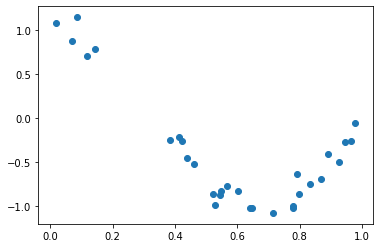

In [35]:
plt.scatter(X,y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


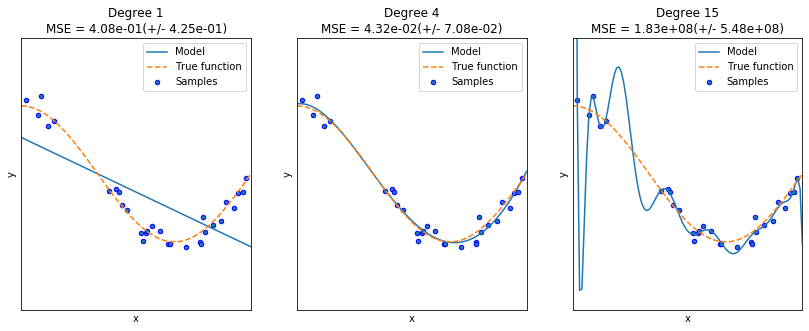

In [19]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]   # degree를 1,4,15 3가지로 설정함

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
   
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)  # 0부터 1까지 테스트 데이터를 100개로 나눠 예측 수행
   
   # 예측 값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
   
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

degree가 1일 때는 매우 심플하게 나옴
- 과소 적합 (너무 심플하게 봄)<br>
- 편향이 높음 (나는 직진만 한다)

degree가 4일 때는 추세를 잘 표현함 -> 학습 잘 됨<br>
- well fit<br>

degree가 15일 때는 모든 학습 데이터를 학습하느라 매우 정교하게 나옴<br>
  - 과대 적합
  - 회귀 계수도 크게 나와 오류 발생할 가능성이 큼
  - 팔랑귀 (모든 데이터 다 가져감) -> 분산이 높게 나옴

## 5-6. Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

In [36]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


# 릿지 적용
ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

# 규제 적용 전에는 5.836이 나왔으므로 규제 적용 후에는 수치가 낮아짐

Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


#### alpha 값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정

In [37]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    
# alpha 값이 커질수록 RMSE가 줄어들어 성능이 좋아짐

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


#### 각 alpha에 따른 회귀 계수 값을 시각화
- 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

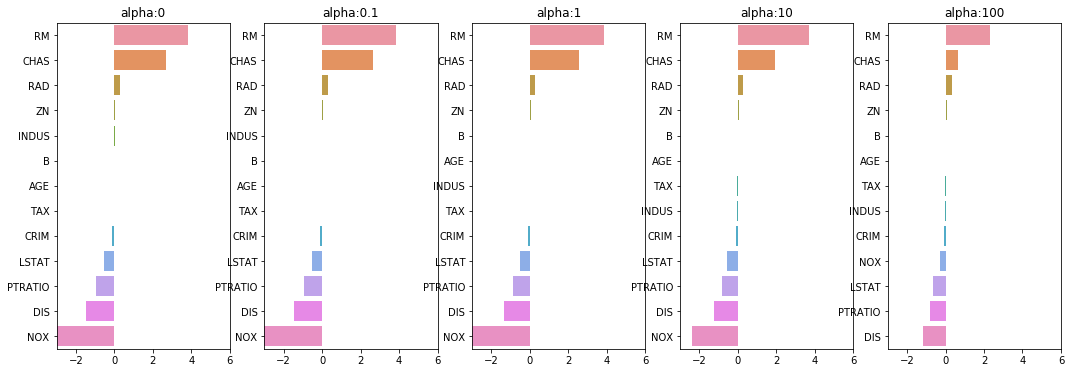

In [38]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()  # alpha값에 따른 칼럼별 회귀계수 출력위해 

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)  # 릿지 객체로 초기화
    ridge.fit(X_data , y_target)  # 학습하여 회귀계수 생성
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )  # data=ridge.coef_를 데이터로 해서 시리즈로 만들고, 인덱스는 X_data.columns 칼럼으로
    colname='alpha:'+str(alpha)  # 축에 따른 title에 나타내기 위해
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)  # 회귀 계수 높은 순으로
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

# 위에서 rm이 가장 크고 nox가 -19로 컸었음 -> alpha 0일때 상태
# alpha가 100으로 갈 수록 nox가 균형적으로 맞춰지고 있음

#### alpha값에 따른 칼럼별 회귀계수 출력

In [23]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# nox와 rm이 점점 균형화되고 있음

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

In [24]:
from sklearn.linear_model import Lasso, ElasticNet

# 모델이 바뀔때마다 모델을 새로 생성하긴 힘들므로 함수 생성해 수정해 감

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv = 5)
        # 1. cross_val_scor는 mse_scores를 리스트 형태로만 반환해 줌  
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)  # 2. 우리는 회귀계수를 칼럼별로 보는것이므로 다시 모델을 학습시키고 
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )  # 3. 회귀계수를 시리즈로 만듬 (인덱스에는 칼럼 삽입)
        colname='alpha:'+str(param) 
        coeff_df[colname] = coeff  # 4. 각각의 시리즈들을 데이터프레임으로 합침
    return coeff_df
# end of get_linear_regre_eval

In [25]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

# 0.07일 때 가장 좋음

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [26]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

# nox는 0.07일때부터 0으로 만들어 아예 제외시킴

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

In [27]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

# 0.5일 때 가장 좋음

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [28]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

# 라쏘를 적용했을 때보다 피처 회귀계수를 0으로 만드는 정도가 줄어듬

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

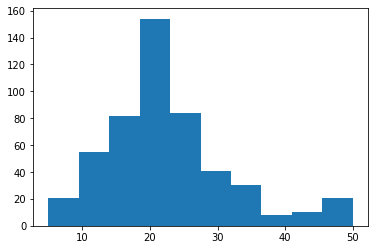

In [39]:
# 타겟값에 대해 정규분포가 이뤄져있는지 확인
print(y_target.shape)
plt.hist(y_target, bins=10)

# 정규분포 형태인 것 확인

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):  
    if method == 'Standard':   # method가 Standard면 StandardScaler()로 변환
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':  # method가 MinMax면 MinMaxScaler()로 변환
        scaled_data = MinMaxScaler().fit_transform(input_data) 
    elif method == 'Log':     # method가 Log면np.log1p로 변환
        scaled_data = np.log1p(input_data)
    else:                     # method에 아무것도 안들어오면 input_data 데이터를 가져감
        scaled_data = input_data

    # p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음
    if p_degree != None:  # p_degree하면 PolynomialFeatures의 degree값으로 변화해줌
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [30]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개
# 원본 그대로, 표준정규분포, 표준정규분포+다항식, 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
# (None, None): 아무것도 변환안함, ('Standard', None): 스탠다드 변환만, ('Standard', 2): 표준정규분포 변환후 2차 다항식으로
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)
    
# 변환 유형:Standard, Polynomial Degree:2일 때 값의 변동성이 커지며 100일 때 좋아짐
# 로그 변환했을 때는 전반적으로 좋아짐


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴